# Enter Name and ID

## Name: Aleksandra Olshanova

## ID: 728945613

In this exercise you will gain experience with Python plotting, with an emphasis on the Seaborn and matplotlib packages. You will also perform an Exploratory Data Analysis (EDA).

In this assignment you will be specifically instructed on the graphs you need to produce. 

Pay close attention to clear figure titles, axis labels, and legends. These must be present in all graphs! ***Colors are not important***

Good luck!

# Data and Setup

Import numpy and pandas:

In [5]:
import numpy as np
import pandas as pd

Import visualization libraries and set %matplotlib inline:

In [256]:
import matplotlib.pyplot as plt 
%matplotlib inline
%reload_ext autoreload
%autoreload 

Read in the People's profile csv file as a dataframe called profiles and check the head of it:

In [258]:
df = pd.read_csv('df_profiles.csv')
df.head()

,age,diet,drinks,drugs,education,height,income,job,gender,sign,smokes,speaks,status
0,22,strictly anything,socially,never,working on college/university,75.0,-1,transportation,m,gemini,sometimes,english,single
1,35,mostly other,often,sometimes,working on space camp,70.0,80000,hospitality / travel,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,anything,socially,NaN,graduated from masters program,68.0,-1,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,vegetarian,socially,NaN,working on college/university,71.0,20000,student,m,pisces,no,"english, german (poorly)",single
4,29,NaN,socially,never,graduated from college/university,66.0,-1,artistic / musical / writer,m,aquarius,no,english,single


Check the info() and describe() of profiles:

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        59946 non-null  int64  
 1   diet       35551 non-null  object 
 2   drinks     56961 non-null  object 
 3   drugs      45866 non-null  object 
 4   education  53318 non-null  object 
 5   height     59943 non-null  float64
 6   income     59946 non-null  int64  
 7   job        51748 non-null  object 
 8   gender     59946 non-null  object 
 9   sign       48890 non-null  object 
 10  smokes     54434 non-null  object 
 11  speaks     59896 non-null  object 
 12  status     59946 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.9+ MB


In [260]:
new_table = df.describe()
new_table

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


Change height values from inches to centimeters by multiplying it by 2.54.

In [261]:
df['height'] = df['height']*2.54 
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,173.470013,20033.222534
std,9.452779,10.146800,97346.192104
min,18.000000,2.540000,-1.000000
25%,26.000000,167.640000,-1.000000
50%,30.000000,172.720000,-1.000000
75%,37.000000,180.340000,-1.000000
max,110.000000,241.300000,1000000.000000


Find the number of the people that participated in the survey, and number of features of the table.


In [262]:
print('People: ' , df.shape[0])
print('Features: ' , df.shape[1])

People:  59946
Features:  13


# EDA (Exploratory data analysis)

## Graph 1

Use the violinplot - to display the following graph:

[Text(0.5, 1.0, 'Violin plot of drinks vs. age')]

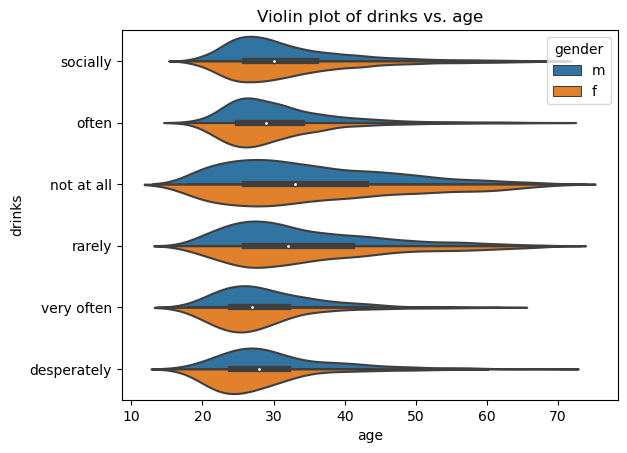

In [265]:
import seaborn as sns
sns.violinplot(x="age", y="drinks", data=df, hue='gender', split=True).set(title='Violin plot of drinks vs. age')

Create this table: <br>(hints: look for groupby().size() and reset_index())

In [266]:
df_grouped = df.groupby(['drinks','gender']).size().reset_index()
df_grouped.columns = ['drinks','gender','numbers']
df_grouped 

,drinks,gender,numbers
0,desperately,f,114
1,desperately,m,208
2,not at all,f,1233
3,not at all,m,2034
4,often,f,1850
5,often,m,3314
6,rarely,f,2408
7,rarely,m,3549
8,socially,f,17223
9,socially,m,24557


## Graph 2

**How many languages do they speak? Let's look at our pool of users**

Start by replacing all the empty cells in the 'speaks' column with 'no answer'. 
We assume these users speak only 1 language (most likely English) and therefore did not respond to the question.

In [267]:
df.loc[df['speaks'].isnull(), ['speaks']] = 'no answer'

Now add a column called 'languages' to the dataframe which holds the number of languages each user speaks (Hint: Use the commas).

In [268]:
pp = df['speaks']
number_of_languages_new_column = []
for x in range(pp.shape[0]): 
    A=1
    for y in pp[x]:
        if y == ',':
            A = A + 1  
    number_of_languages_new_column.append(A)
df['languages'] = number_of_languages_new_column
df.head()

,age,diet,drinks,drugs,education,height,income,job,gender,sign,smokes,speaks,status,languages
0,22,strictly anything,socially,never,working on college/university,190.50,-1,transportation,m,gemini,sometimes,english,single,1
1,35,mostly other,often,sometimes,working on space camp,177.80,80000,hospitality / travel,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,3
2,38,anything,socially,NaN,graduated from masters program,172.72,-1,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,3
3,23,vegetarian,socially,NaN,working on college/university,180.34,20000,student,m,pisces,no,"english, german (poorly)",single,2
4,29,NaN,socially,never,graduated from college/university,167.64,-1,artistic / musical / writer,m,aquarius,no,english,single,1


Use plt.hist to show a histogram of the number of users that speak a certain number of languages.

(array([29122., 17229.,  8682.,  3251.,  1662.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

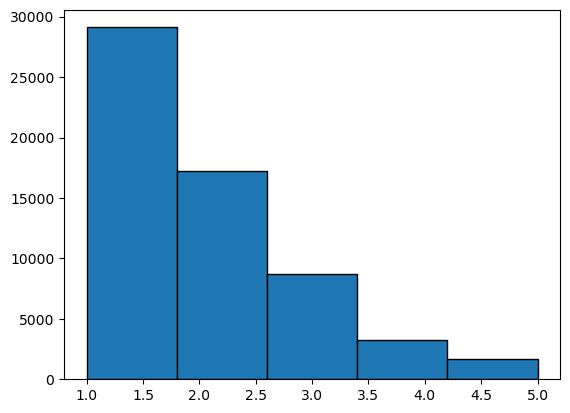

In [269]:
plt.hist(number_of_languages_new_column, bins = 5, histtype='bar', ec='black')

**What is the average number of languages people know in the survey?**

In [270]:
df['languages'].mean()

1.8506655990391352

## Graph 3

According to Wikipedia, the average height for adult males (ages 20+) in the US is 175.7cm and 161.8cm for adult females.   Let's see how this compares with the heights provided by users in their profiles. Use boxplot to show the distribution of users.

Note that the heights provided in the dataframe are not in cm, therefore add a new column with the height values in units of centimeters.

<AxesSubplot:xlabel='gender', ylabel='height'>

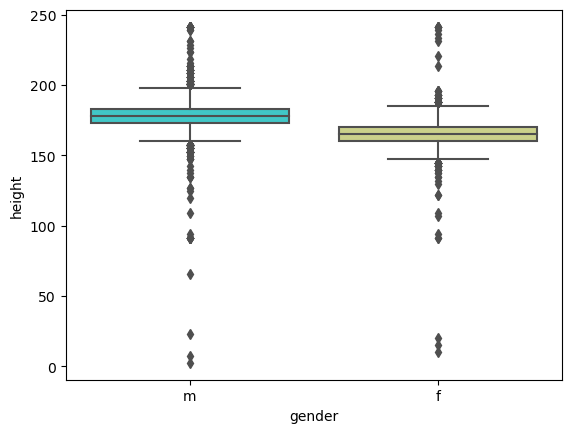

In [271]:
sns.boxplot(x="gender", y="height", data=df, palette='rainbow')


**Lets adjust the graph to certain expected range.**


**What is the average for male and female users though?**

(140.0, 200.0)

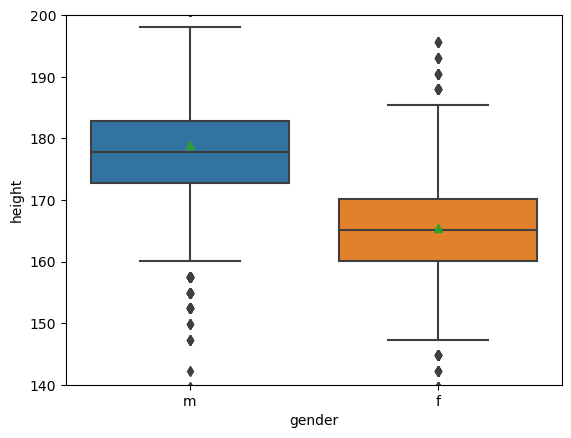

In [272]:
sns.boxplot(x="gender", y="height", data=df, showmeans=True)
plt.ylim(140, 200)

In [273]:
average_height = df.groupby(['gender'])['height'].mean()
average_height

gender
f    165.363837
m    178.926471
Name: height, dtype: float64

## Graph 4

**Let's find out what people do for a living.** 

<br>**Find out the distribution of each job by precents and sort it.**

In [274]:
job_distribution = df['job'].value_counts()
total = df['job'].value_counts().sum()
new = job_distribution.apply(lambda x : x * 100 / total)
new

other                                14.665301
student                               9.434181
science / tech / engineering          9.368478
computer / hardware / software        9.099869
artistic / musical / writer           8.578109
sales / marketing / biz dev           8.485352
medicine / health                     7.111386
education / academia                  6.788668
executive / management                4.585684
banking / financial / real estate     4.378913
entertainment / media                 4.347994
law / legal services                  2.668702
hospitality / travel                  2.635851
construction / craftsmanship          1.973023
clerical / administrative             1.555616
political / government                1.368169
rather not say                        0.842545
transportation                        0.707274
unemployed                            0.527557
retired                               0.483110
military                              0.394218
Name: job, dt

**Let's take a closer look at 4 different fields and try to determine if they are male or female dominated:**

**The four fields we will look at are:**

**1. Hi-tech jobs which include 'science / tech / engineering' and 'computer / hardware / software'**

**2. Money related jobs which include 'banking / financial / real estate'**

**3. Jobs in the medical field including 'medicine / health'**

**4. Jobs in the arts 'artistic / musical / writer'**

In [275]:
HH = df.groupby(['job'])['gender'].value_counts().unstack()
HH

gender,f,m
job,,
artistic / musical / writer,1882,2557
banking / financial / real estate,790,1476
clerical / administrative,572,233
computer / hardware / software,641,4068
construction / craftsmanship,81,940
education / academia,2155,1358
entertainment / media,681,1569
executive / management,755,1618
hospitality / travel,570,794


Using pd.crosstab function (Google it), make the following counter table, and save it in a new dataframe:

In [276]:
MM = pd.crosstab(df.gender, df.job)
MM['Hi-tech jobs'] = MM['science / tech / engineering'] + MM['computer / hardware / software']
MM.rename(columns = {'artistic / musical / writer' : 'Arts job','medicine / health' : 'Medical jobs','banking / financial / real estate' : 'Money jobs'}, inplace = True)
important_fields = MM[['Arts job', 'Hi-tech jobs', 'Medical jobs', 'Money jobs']]
important_fields

job,Arts job,Hi-tech jobs,Medical jobs,Money jobs
gender,,,,
f,1882,1657,2187,790
m,2557,7900,1493,1476


Check out https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html, then create the next pie plot:

array([<AxesSubplot:ylabel='Arts job'>,
       <AxesSubplot:ylabel='Hi-tech jobs'>,
       <AxesSubplot:ylabel='Medical jobs'>,
       <AxesSubplot:ylabel='Money jobs'>], dtype=object)

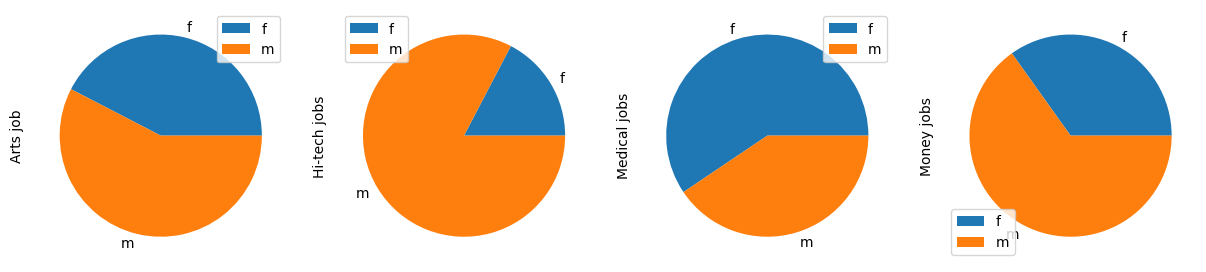

In [277]:
plot = important_fields.plot(kind = 'pie', subplots=True, figsize=(15, 11))
plot

# Graph 5 
Find the unique values of smokes column:


In [278]:
df['smokes'].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

Select only the people who has value of 'yes' or 'no', and create the following graph with Facetgrid:

In [279]:
Yes = df.loc[df['smokes'] == 'yes']
No = df.loc[df['smokes'] == 'no']
new_df = pd.concat([Yes, No]) 
new_df.head()

,age,diet,drinks,drugs,education,height,income,job,gender,sign,smokes,speaks,status,languages
10,35,mostly anything,socially,NaN,NaN,177.80,-1,NaN,m,taurus,yes,english,available,1
90,24,anything,socially,never,graduated from college/university,187.96,-1,sales / marketing / biz dev,m,cancer,yes,english,single,1
130,30,NaN,socially,sometimes,dropped out of college/university,175.26,-1,NaN,m,gemini but it doesn&rsquo;t matter,yes,english,available,1
146,28,NaN,desperately,often,NaN,177.80,-1,NaN,m,sagittarius,yes,english,single,1
224,23,NaN,often,sometimes,working on college/university,157.48,20000,artistic / musical / writer,f,sagittarius and it&rsquo;s fun to think about,yes,english,single,1


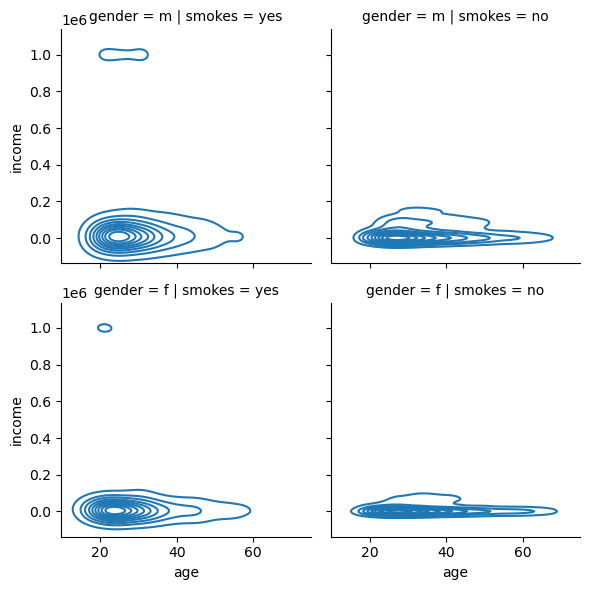

In [280]:
g = sns.FacetGrid(new_df, col='smokes', row = 'gender')
g.map(sns.kdeplot, 'age', 'income')